<a href="https://colab.research.google.com/github/quicksilverri/medical_data_visualization/blob/main/medical_data.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Importing and examining the data

Link to a task: https://www.freecodecamp.org/learn/data-analysis-with-python/data-analysis-with-python-projects/medical-data-visualizer

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

In [2]:
data = pd.read_csv('medical_examination.csv')

In [ ]:
data.sample(5)

,id,age,sex,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio
49691,70942,22126,1,167,59.0,120,80,1,1,0,0,1,0
1839,2595,19614,2,168,65.0,130,90,1,1,0,0,1,1
29279,41839,18332,1,160,77.0,120,80,1,1,0,0,1,0
10042,14329,20197,1,157,68.0,130,80,1,1,0,0,1,0
29262,41813,22562,1,168,66.0,120,70,1,1,0,0,1,0


age: person's age in days  
sex: person's sex (categorical data)   
height: person's height in santimeters   
weight: person's weight in kilograms   
ap_hi: person's systolic blood pressure	  
ap_lo: person's diastolic blood pressure  	
cholesterol: person's level of cholesterol (1: normal, 2: above normal, 3: well above normal)  
gluc: person's level of glucose (1: normal, 2: above normal, 3: well above normal)  
smoke: if person smokes   
alco: if person consumps alcohol  
active: if person is physically active  
cardio: if person has any cardiovascular illnesses  
(1: True, 0: False)



In [ ]:
data.dtypes

id               int64
age              int64
sex              int64
height           int64
weight         float64
ap_hi            int64
ap_lo            int64
cholesterol      int64
gluc             int64
smoke            int64
alco             int64
active           int64
cardio           int64
dtype: object

In [ ]:
# we do not have any nan values which is nice

data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 70000 entries, 0 to 69999
Data columns (total 13 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   id           70000 non-null  int64  
 1   age          70000 non-null  int64  
 2   sex          70000 non-null  int64  
 3   height       70000 non-null  int64  
 4   weight       70000 non-null  float64
 5   ap_hi        70000 non-null  int64  
 6   ap_lo        70000 non-null  int64  
 7   cholesterol  70000 non-null  int64  
 8   gluc         70000 non-null  int64  
 9   smoke        70000 non-null  int64  
 10  alco         70000 non-null  int64  
 11  active       70000 non-null  int64  
 12  cardio       70000 non-null  int64  
dtypes: float64(1), int64(12)
memory usage: 6.9 MB


In [ ]:
data.nunique()

id             70000
age             8076
sex                3
height           109
weight           287
ap_hi            153
ap_lo            157
cholesterol        3
gluc               3
smoke              2
alco               2
active             2
cardio             2
dtype: int64

In [ ]:
data.describe()

,id,age,sex,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio
count,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000
mean,49972.419900,19468.865814,1.349843,164.359229,74.205690,128.817286,96.630414,1.366871,1.226457,0.088129,0.053771,0.803729,0.499700
std,28851.302323,2467.251667,0.477253,8.210126,14.395757,154.011419,188.472530,0.680250,0.572270,0.283484,0.225568,0.397179,0.500003
min,0.000000,10798.000000,1.000000,55.000000,10.000000,-150.000000,-70.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000
25%,25006.750000,17664.000000,1.000000,159.000000,65.000000,120.000000,80.000000,1.000000,1.000000,0.000000,0.000000,1.000000,0.000000
50%,50001.500000,19703.000000,1.000000,165.000000,72.000000,120.000000,80.000000,1.000000,1.000000,0.000000,0.000000,1.000000,0.000000
75%,74889.250000,21327.000000,2.000000,170.000000,82.000000,140.000000,90.000000,2.000000,1.000000,0.000000,0.000000,1.000000,1.000000
max,99999.000000,23713.000000,3.000000,250.000000,200.000000,16020.000000,11000.000000,3.000000,3.000000,1.000000,1.000000,1.000000,1.000000


# Creating a new column

In [ ]:
data['BMI'] = data['weight'] * 10000 / data['height'] ** 2
data['overweight'] = data['BMI'] > 25

data['overweight'] = data['BMI'].apply(lambda x: 1 if x > 25 else 0)

data.sample(5)

,id,age,sex,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio,BMI,overweight
44543,63619,23430,1,156,65.0,145,90,1,2,0,0,1,0,26.709402,1
38077,54350,14596,1,175,57.0,140,80,1,1,0,0,0,1,18.612245,0
56584,80765,19867,1,172,89.0,130,90,1,1,0,0,1,1,30.083829,1
46213,66004,21917,1,165,65.0,120,80,1,1,0,0,1,0,23.875115,0
56105,80049,21235,1,169,58.0,120,80,1,1,0,0,1,0,20.307412,0


In [ ]:
# by the task we do not need BMI column so we drop it 

data = data.drop('BMI', axis=1)

# Normalizing data 
Let's have a look at _gluc_ and _cholesterol_ columns

In [24]:
data['gluc'].value_counts()

1    59479
3     5331
2     5190
Name: gluc, dtype: int64

In [25]:
data['cholesterol'].value_counts()

1    52385
2     9549
3     8066
Name: cholesterol, dtype: int64

_Task:_ Normalize the data by making 0 always good and 1 always bad. If the value of cholesterol or gluc is 1, make the value 0. If the value is more than 1, make the value 1.

In [26]:
normalize = lambda x: 0 if x == 1 else 1
data['cholesterol'] = data['cholesterol'].apply(normalize)
data['gluc'] = data['gluc'].apply(normalize)

In [27]:
data['gluc'].value_counts()

0    59479
1    10521
Name: gluc, dtype: int64

In [28]:
data['cholesterol'].value_counts()

0    52385
1    17615
Name: cholesterol, dtype: int64

# Plotting
_Task:_ Convert the data into long format and create a chart that shows the value counts of the categorical features using seaborn's catplot(). The dataset should be split by 'Cardio' so there is one chart for each cardio value. The chart should look like examples/Figure_1.png.

In [49]:
long_data = pd.melt(data, id_vars=['id', 'cardio'], value_vars=['cholesterol', 'gluc', 'smoke', 'alco', 'active'])

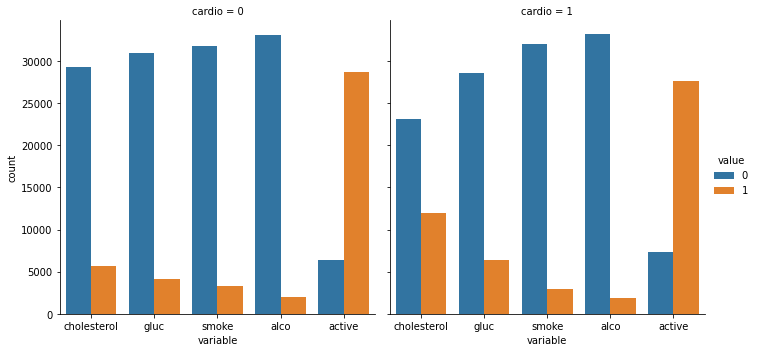

In [51]:
sns.catplot(kind='count', x='variable', hue='value', data=long_data, col='cardio')

# Cleaning 

Clean the data. Filter out the following patient segments that represent incorrect data:
* diastolic pressure is higher than systolic (Keep the correct data with (df
['ap_lo'] <= df['ap_hi']))
* height is less than the 2.5th percentile (Keep the correct data with (df['height'] >= df['height'].quantile(0.025)))
* height is more than the 97.5th percentile
* weight is less than the 2.5th percentile
* weight is more than the 97.5th percentile

In [4]:
mask_pressure = data['ap_lo'] <= data['ap_hi']
mask_height_b = data['height'] >= data['height'].quantile(q=0.025)
mask_height_up = data['height'] <= data['height'].quantile(q=0.975)
mask_weight_b = data['weight'] >= data['weight'].quantile(q=0.025)
mask_weight_up = data['weight'] <= data['weight'].quantile(q=0.975)

In [5]:
clean_data = data[mask_pressure & mask_height_b & mask_height_up & mask_weight_b & mask_weight_up]

{'boxes': [<matplotlib.lines.Line2D at 0x7fcfc5f60610>],
 'caps': [<matplotlib.lines.Line2D at 0x7fcfc5ee5650>,
 'fliers': [<matplotlib.lines.Line2D at 0x7fcfc5eef690>],
 'means': [],
 'medians': [<matplotlib.lines.Line2D at 0x7fcfc5eef150>],
 'whiskers': [<matplotlib.lines.Line2D at 0x7fcfc5f60b90>,
  <matplotlib.lines.Line2D at 0x7fcfc5ee5110>]}

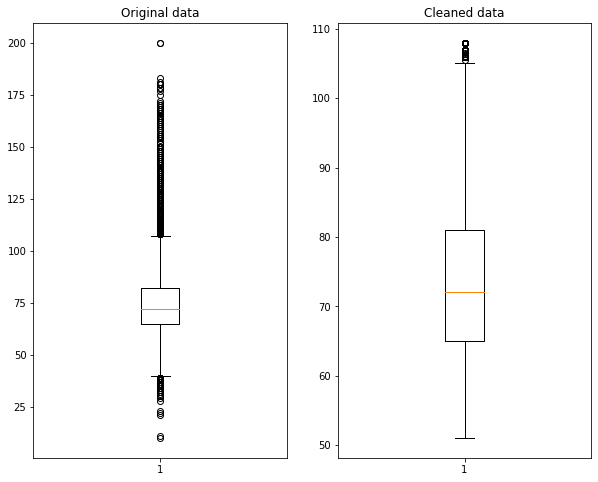

In [16]:
plt.figure(figsize=(10, 8))
plt.subplot(1, 2, 1)
plt.title('Original data')
plt.boxplot(data.weight)
plt.subplot(1, 2, 2)
plt.title('Cleaned data')
plt.boxplot(clean_data.weight)

As we can see, there are way less outliers in the second plot.

# Heatmap plot

Create a correlation matrix using the dataset. Plot the correlation matrix using seaborn's heatmap(). Mask the upper triangle. The chart should look like examples/Figure_2.png.

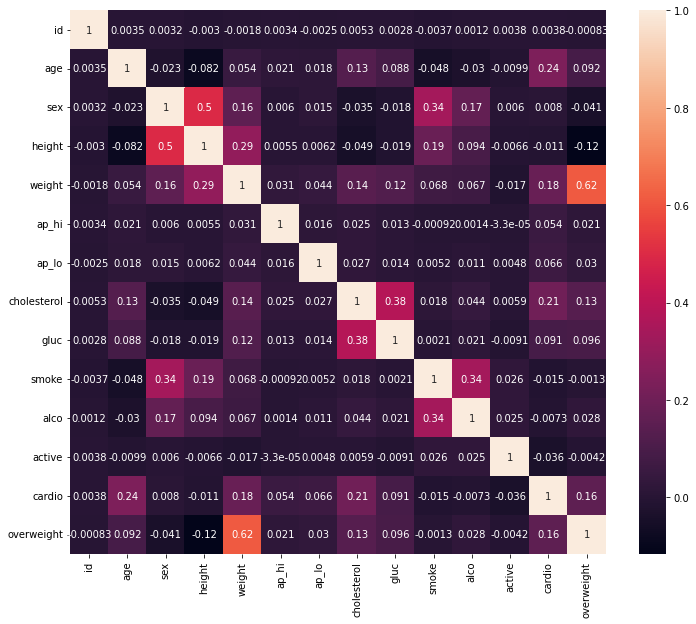

In [ ]:
plt.figure(figsize=(12, 10))
sns.heatmap(data.corr(method="pearson"), annot=True)
plt.show()